In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, plot, iplot
from statsmodels.stats.multicomp import MultiComparison
from scipy import stats
import numpy as np
import math
import scipy


# SEED TRUE 1st iteration

In [4]:
path = "C:\\Users\\amichal\\OneDrive\\Work\\PhD\\PhD- Critical Mass\\Data\\Athens Simulation Results"

In [5]:
results = pd.read_csv(path + "\\results_first_time_mp_Athens_centre_50to2200_step20.csv", sep = ",", encoding="1253")

In [8]:
results.columns = ["iteration", "nb_people", "days_missing", "minutes_missing"]

In [68]:
results.head()

,iteration,nb_people,days_missing,minutes_missing
0,0,50,36.000694,51841.0
1,1,50,36.000694,51841.0
2,2,50,2.833333,4080.0
3,3,50,0.959028,1381.0
4,4,50,36.000694,51841.0


In [11]:
#remove the more than 14
len(results)

1080

In [74]:
results_min36 = results.loc[results.days_missing <=35]
len(results)- len(results_min36)

50

# Exploration

<AxesSubplot:xlabel='nb_people'>

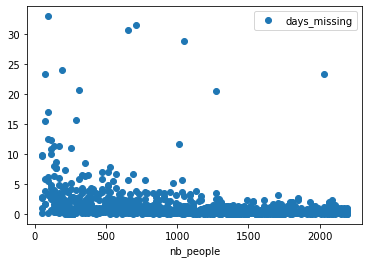

In [13]:
results_min36.plot(x='nb_people', y='days_missing', style='o')

<AxesSubplot:xlabel='nb_people'>

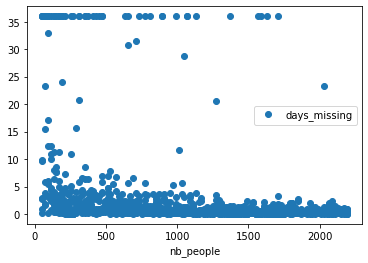

In [14]:
results.plot(x='nb_people', y='days_missing', style='o')

# Mean and Median plot

[Text(0.5, 0, 'Number of users'), Text(0, 0.5, 'Days to be found')]

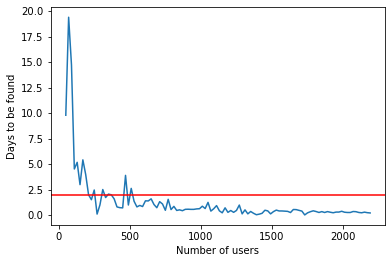

In [15]:
ax = results.groupby("nb_people")["days_missing"].median().plot()
plt.axhline(y=2, color='r', linestyle='-')
ax.set(xlabel='Number of users', ylabel='Days to be found')

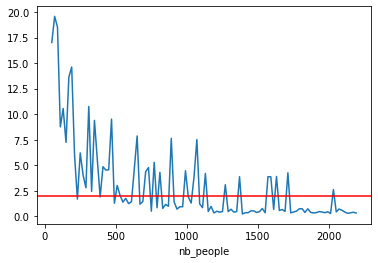

In [16]:
results.groupby("nb_people")["days_missing"].mean().plot()
plt.axhline(y=2, color='r', linestyle='-')

# Remove outliers

## remove outliers: 1st approach

In [69]:
results_outliers = results[(np.abs(stats.zscore(results.days_missing)) < 3)]

In [70]:
len(results_outliers)

1026

<AxesSubplot:xlabel='nb_people'>

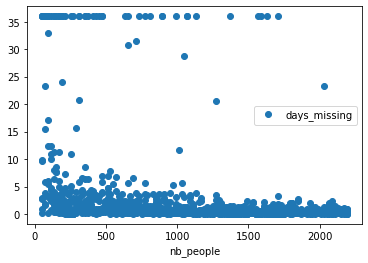

In [71]:
results.plot(x='nb_people', y='days_missing', style='o')

<AxesSubplot:xlabel='nb_people'>

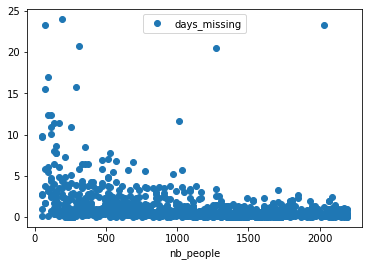

In [72]:
results_outliers.plot(x='nb_people', y='days_missing', style='o')

In [76]:
results_min36.groupby("nb_people")["days_missing"].agg(['min', 'max', 'mean', 'median', 'std']).to_excel('./resultsAthens_stats_10iterations.xlsx')

## Exploration without outliers

Inspiration from https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly

In [56]:
df = results_outliers.groupby("nb_people")["days_missing"].median().reset_index()
x = df.nb_people
y = df.days_missing

In [57]:
np.polyfit(np.log(x), y, 1)

array([-1.28374022,  9.65342544])

In [58]:
y_fitted= -2.26250717*np.log(x) + 16.61491907

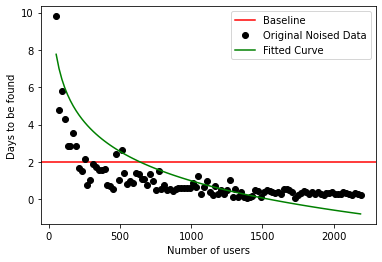

In [59]:
plt.figure()
#ax = results_outliers.groupby("nb_people")["days_missing"].median().plot()
plt.axhline(y=2, color='r', linestyle='-', label = "Baseline")
ax = plt.plot(x, y, 'ko', label="Original Noised Data")
#ax.set(xlabel='Number of users', ylabel='Days to be found')
plt.xlabel("Number of users")
plt.ylabel("Days to be found")
plt.plot(x, y_fitted, 'g-', label="Fitted Curve")
plt.legend()
plt.show()
#ax.plot(x,y)

In [28]:

y_fitted= -1.28374022*np.log(x) + 9.65342544

In [39]:
np.polyfit(x, np.log(y), 1)

array([-0.00116915,  0.78841375])

In [40]:
y_fitted = np.exp(1.03052237) * np.exp(-0.00131204 * x)

In [30]:
np.polyfit(x, np.log(y), 1, w=np.sqrt(y))

array([-0.00140068,  1.22017725])

In [32]:
y_fitted = np.exp(1.43) * np.exp(-2.13882345*1/(10**3) * x) 

In [34]:
from scipy.optimize import curve_fit

In [35]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [36]:
yn = y + 0.2*np.random.normal(size=len(x))

In [37]:
popt, pcov = curve_fit(func, x, yn)

C:\Users\amichal\Anaconda3\envs\phd_env\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning:

Covariance of the parameters could not be estimated



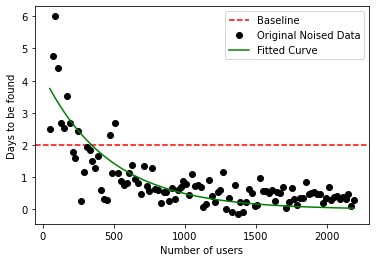

In [38]:
plt.figure()
plt.axhline(y=2, color='r', linestyle='dashed', label = "Baseline")
plt.plot(x, yn, 'ko', label="Original Noised Data")
#plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.xlabel("Number of users")
plt.ylabel("Days to be found")
plt.plot(x, y_fitted, 'g-', label='Fitted Curve')
plt.legend()
plt.show()

# source: https://scientific-python-101.readthedocs.io/scipy/fitting_curves.html

In [60]:
def parabola(x, a):
    return a/x

In [61]:
fit_params, pcov = scipy.optimize.curve_fit(parabola, x, y)
y_fit = parabola(x, *fit_params)

In [62]:
fit_params

array([466.17963856])

In [63]:
np.sqrt(np.diag(pcov))

array([12.16686903])

In [64]:
pcov

array([[148.03270204]])

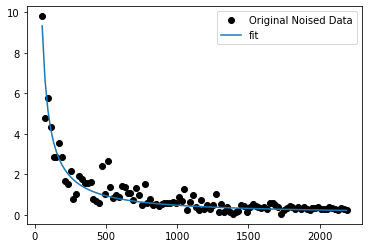

In [65]:
plt.figure()
plt.plot(x, y, 'ko', label="Original Noised Data")
#plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.plot(x, y_fit, label='fit')
plt.legend()
plt.show()

In [66]:
#compute the error
#  https://stats.stackexchange.com/questions/38115/how-do-i-interpret-the-covariance-matrix-from-a-curve-fit
np.linalg.norm(y-y_fit)

4.365497329023764

# other sources
https://www.w3schools.com/python/python_ml_polynomial_regression.asp

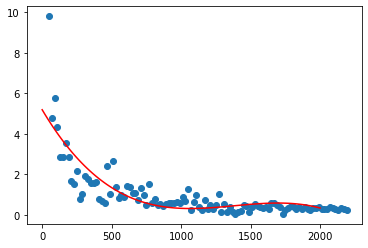

In [55]:
mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(0, 2000, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline), c = "r")

In [56]:
print(mymodel)

            3             2
-2.138e-09 x + 8.856e-06 x - 0.01159 x + 5.185


In [57]:
import sklearn
from sklearn.metrics import r2_score
sklearn.metrics.r2_score(y, mymodel(x))

0.6891760141568756

# Boxplots

In [77]:
results100 =results.loc[((results.nb_people -50)%50 == 0)]

[Text(0.5, 0, 'Number of users'), Text(0, 0.5, 'Days to be found')]

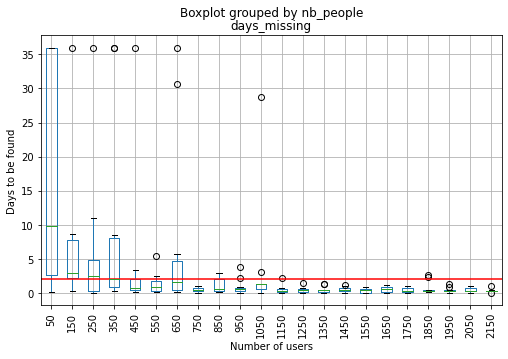

In [78]:
ax = results100.boxplot(column=['days_missing'], by=['nb_people'], rot = 90, figsize = (8,5))
plt.axhline(y=2, color='r', linestyle='-')
ax.set(xlabel='Number of users', ylabel='Days to be found')

In [79]:
results100_out = results_outliers.loc[(results.nb_people%50 == 0)]

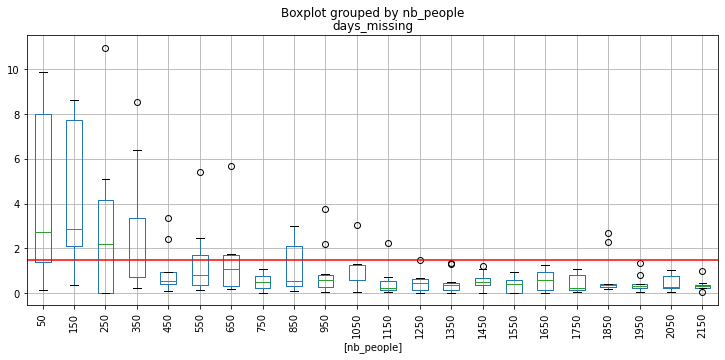

In [80]:
results100_out.boxplot(column=['days_missing'], by=['nb_people'], rot = 90, figsize = (12,5))
plt.axhline(y=1.5, color='r', linestyle='-')

In [81]:
total_grouped = results.groupby("nb_people")["days_missing"].agg(['size', 'median', 'mean', 'std']).reset_index().reset_index()

In [82]:
total_grouped.head()

,index,nb_people,size,median,mean,std
0,0,50,10,9.803472,17.018611,16.653654
1,1,70,10,19.403819,19.580000,15.591952
2,2,90,10,14.728472,18.527500,15.136601
3,3,110,10,4.538542,8.770972,10.360542
4,4,130,10,5.189583,10.563125,13.869231


## ANOVA

Inspiration from https://pythonhealthcare.org/2018/04/13/55-statistics-multi-comparison-with-tukeys-test-and-the-holm-bonferroni-method/

In [83]:
mc = MultiComparison(results.days_missing, results.nb_people)

In [84]:
mc_results = mc.tukeyhsd()
print(mc_results)
mc_results.summary()

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    50     70   2.5614    0.9 -11.3294 16.4522  False
    50     90   1.5089    0.9 -12.3819 15.3997  False
    50    110  -8.2476    0.9 -22.1385  5.6432  False
    50    130  -6.4555    0.9 -20.3463  7.4353  False
    50    150  -9.7671  0.886 -23.6579  4.1238  False
    50    170  -3.3808    0.9 -17.2717   10.51  False
    50    190  -2.3952    0.9  -16.286 11.4956  False
    50    210 -11.0281 0.5776  -24.919  2.8627  False
    50    230 -15.3203 0.0079 -29.2112 -1.4295   True
    50    250 -10.7992 0.6336   -24.69  3.0917  False
    50    270  -12.969 0.1348 -26.8599  0.9218  False
    50    290 -14.2105 0.0342 -28.1013 -0.3197   True
    50    310  -6.2544    0.9 -20.1452  7.6365  False
    50    330 -14.5628 0.0219 -28.4537  -0.672   True
    50    350  -7.6163    0.9 -21.5072  6.2745  False
    50    370 -11.4511 0.475

group1,group2,meandiff,p-adj,lower,upper,reject
50,70,2.5614,0.9,-11.3294,16.4522,False
50,90,1.5089,0.9,-12.3819,15.3997,False
50,110,-8.2476,0.9,-22.1385,5.6432,False
50,130,-6.4555,0.9,-20.3463,7.4353,False
50,150,-9.7671,0.886,-23.6579,4.1238,False
50,170,-3.3808,0.9,-17.2717,10.51,False
50,190,-2.3952,0.9,-16.286,11.4956,False
50,210,-11.0281,0.5776,-24.919,2.8627,False
50,230,-15.3203,0.0079,-29.2112,-1.4295,True
50,250,-10.7992,0.6336,-24.69,3.0917,False


In [85]:
###### mc_results = mc.tukeyhsd()
print(mc_results)
mc_results

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    50     70   2.5614    0.9 -11.3294 16.4522  False
    50     90   1.5089    0.9 -12.3819 15.3997  False
    50    110  -8.2476    0.9 -22.1385  5.6432  False
    50    130  -6.4555    0.9 -20.3463  7.4353  False
    50    150  -9.7671  0.886 -23.6579  4.1238  False
    50    170  -3.3808    0.9 -17.2717   10.51  False
    50    190  -2.3952    0.9  -16.286 11.4956  False
    50    210 -11.0281 0.5776  -24.919  2.8627  False
    50    230 -15.3203 0.0079 -29.2112 -1.4295   True
    50    250 -10.7992 0.6336   -24.69  3.0917  False
    50    270  -12.969 0.1348 -26.8599  0.9218  False
    50    290 -14.2105 0.0342 -28.1013 -0.3197   True
    50    310  -6.2544    0.9 -20.1452  7.6365  False
    50    330 -14.5628 0.0219 -28.4537  -0.672   True
    50    350  -7.6163    0.9 -21.5072  6.2745  False
    50    370 -11.4511 0.475

In [87]:
df = pd.DataFrame(data=mc_results._results_table.data[1:], columns=mc_results._results_table.data[0])


In [88]:
group0 = results.loc[results["nb_people"] == 50, "days_missing"]

group1 = results.loc[results["nb_people"] == 150, "days_missing"]
group2 = results.loc[results["nb_people"] == 350, "days_missing"]
group3 = results.loc[results["nb_people"] == 550, "days_missing"]
group4 = results.loc[results["nb_people"] == 750, "days_missing"]
group5 = results.loc[results["nb_people"] == 950, "days_missing"]
group6 = results.loc[results["nb_people"] == 1050, "days_missing"]


In [89]:
F_statistic, pVal = stats.f_oneway(group3, group6)
print ('P value:')
print (pVal)

P value:
0.3942705611547901


In [90]:
df.loc[df.reject == True]

,group1,group2,meandiff,p-adj,lower,upper,reject
8,50,230,-15.3203,0.0079,-29.2112,-1.4295,True
11,50,290,-14.2105,0.0342,-28.1013,-0.3197,True
13,50,330,-14.5628,0.0219,-28.4537,-0.6720,True
16,50,390,-15.1036,0.0107,-28.9944,-1.2128,True
21,50,490,-15.7255,0.0044,-29.6163,-1.8347,True
...,...,...,...,...,...,...,...
823,190,2110,-14.1860,0.0353,-28.0769,-0.2952,True
824,190,2130,-14.3092,0.0302,-28.2000,-0.4183,True
825,190,2150,-14.2669,0.0319,-28.1578,-0.3761,True
826,190,2170,-14.2123,0.0341,-28.1031,-0.3215,True


# Chapter 2:  Batch number of times found

In [102]:
results_no_times = pd.read_csv(path + "\\results_no_times_Athens_centre_50to2200_step20_until2days.csv", sep = ",", encoding="1253")

## Remove outliers

<AxesSubplot:xlabel='nb_people'>

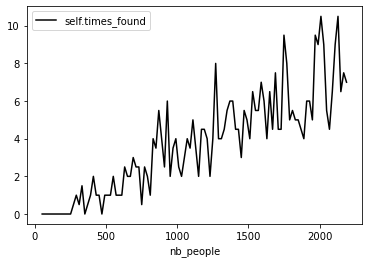

In [94]:
df = results_no_times[["nb_people","self.times_found"]]
df.groupby("nb_people").median().plot(color = "black")

In [104]:
results_notimes_out = results_no_times[(np.abs(stats.zscore(results_no_times["self.times_found"])) < 1)]

In [97]:
df = results_notimes_out[["nb_people","self.times_found"]]

<AxesSubplot:xlabel='nb_people'>

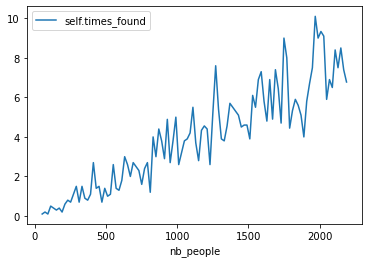

In [107]:
#results_notimes_out.drop('int(self)', axis=1).groupby("nb_people").median().plot()
df.groupby("nb_people").mean().plot()

In [99]:
test = df.groupby("nb_people").median().reset_index()
test.columns = ["nb_people", "median_times_found"]

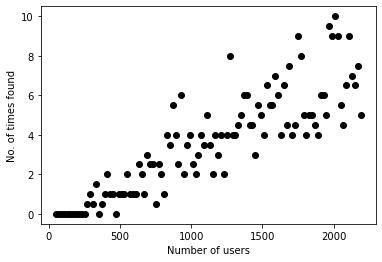

In [108]:
plt.figure()
y = test.median_times_found
x= test.nb_people
ax = plt.plot(x, y, 'ko')
#ax.set(xlabel='Number of users', ylabel='Days to be found')
plt.xlabel("Number of users")
plt.ylabel("No. of times found")
#plt.legend()
plt.show()
#ax.plot(x,y)